# Implementation

This section will demonstrate how to fit the discriminative classifiers discussed in this chapter with `scikit-learn`. Note that other libraries are frequently used—e.g. `statsmodels` for logistic regresssion and `tensorflow` for the perceptron. 

For binary tasks, we'll be using the {doc}`breast cancer </content/appendix/data>` dataset and for multiclass tasks, we'll be using the {doc}`wine </content/appendix/data>` dataset.

In [9]:
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import datasets

# import data
cancer = datasets.load_breast_cancer()
X_cancer = cancer['data']
y_cancer = cancer['target']
wine = datasets.load_wine()
X_wine = wine['data']
y_wine = wine['target']

## Logistic Regression

### Binary Logistic Regression

A standard `scikit-learn` implementation of binary logistic regression is shown below. Note the two arguments set when instantiating the model: `C` is a regularization term where a higher `C` indicates *less* penalty on the magnitude of the coefficients and `max_iter` determines the maximum number of iterations the solver will use. We set `C` to be arbitrarily high such that there is effectively no regulariation and `max_iter` to be 1,000, which is enough for this model to converge. 

In [10]:
from sklearn.linear_model import LogisticRegression
binary_model = LogisticRegression(C = 10**5, max_iter = 1e5)
binary_model.fit(X_cancer, y_cancer)

LogisticRegression(C=100000, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100000.0,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

`scikit-learn`'s logistic regression model can return two forms of predictions: the predicted classes or the predicted probabilities. The `.predict()` method predicts an observation for each class while `.predict_proba()` gives the probability for all classes included in the training set (in this case, just 0 and 1).

In [11]:
y_hats = binary_model.predict(X_cancer)
p_hats = binary_model.predict_proba(X_cancer)
print(f'Training accuracy: {binary_model.score(X_cancer, y_cancer)}')

Training accuracy: 0.984182776801406


### Multiclass Logistic Regression

Multiclass logistic regression can be fit in `scikit-learn` as below. In fact, no arguments need to be changed in order to fit a multiclass model versus a binary one. However, the implementation below adds one new argument. Setting `multiclass` equal to 'multinomial' tells the model explicitly to follow the algorithm introduced in the {doc}`concept section </content/c3/s2/logistic_regression>`. This will be done by default for non-binary problems unless the `solver` is set to 'liblinear'. In that case, it will fit a "[one-versus-rest](https://www.google.com/search?q=one+versus+rest+classifier&oq=one+versus+rest+classifier&aqs=chrome..69i57j0l4j69i64.3569j0j1&sourceid=chrome&ie=UTF-8)" model.

In [12]:
from sklearn.linear_model import LogisticRegression
multiclass_model = LogisticRegression(multi_class = 'multinomial', C = 10**5, max_iter = 10**4)
multiclass_model.fit(X_wine, y_wine)

LogisticRegression(C=100000, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=10000,
                   multi_class='multinomial', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

Again, we can see the predicted classes and predicted probabilities for each class, as below. 

In [15]:
y_hats = multiclass_model.predict(X_wine)
p_hats = multiclass_model.predict_proba(X_wine)
print(f'Training accuracy: {multiclass_model.score(X_wine, y_wine)}')

Training accuracy: 1.0


## The Perceptron Algorithm

The perceptron algorithm is implemented below. This algorithm is rarely used in practice but serves as an important part of neural networks, the topic of Chapter 7. 

In [17]:
from sklearn.linear_model import Perceptron
perceptron = Perceptron()
perceptron.fit(X_cancer, y_cancer);

## Fisher's Linear Discriminant 

Finally, we fit Fisher's Linear Discriminant with the `LinearDiscriminantAnalysis` class from `scikit-learn`. This class can also be viewed as a generative model, which is discussed in the next chapter, but the implementation below reduces to the discriminative classifier derived in the concept section. Specifying `n_components = 1` tells the model to reduce the data to one dimension. This is the equivalent of generating the 

$$
f(\bx_n) = \bbeta^\top \bx_n
$$

transformations that we saw in the concept section. We can then see if the two classes are separated by checking that either 1) $f(\bx_n) < f(\bx_m)$ for all $n$ in class 0 and $m$ in class 1 or 2) $f(\bx_n) > f(\bx_m)$ for all $n$ in class 0 and $m$ in class 1. Equivalently, we can see that the two classes are not separated in the histogram below. 


In [28]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
lda = LinearDiscriminantAnalysis(n_components = 1)
lda.fit(X_cancer, y_cancer);

f0 = np.dot(X_cancer, lda.coef_[0])[y_cancer == 0]
f1 = np.dot(X_cancer, lda.coef_[0])[y_cancer == 1]
print('Separated:', (min(f0) > max(f1)) | (max(f0) < min(f1)))

Separated: False


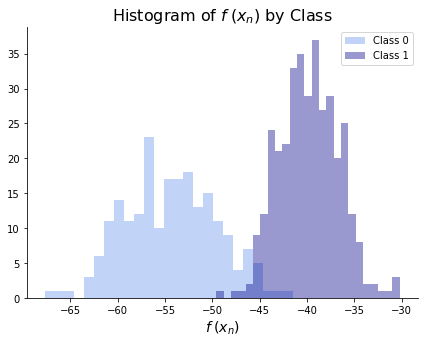

In [29]:
fig, ax = plt.subplots(figsize = (7,5))
sns.distplot(f0, bins = 25, kde = False, 
             color = 'cornflowerblue', label = 'Class 0')
sns.distplot(f1, bins = 25, kde = False, 
             color = 'darkblue', label = 'Class 1')
ax.set_xlabel(r"$f\hspace{.25}(x_n)$", size = 14)
ax.set_title(r"Histogram of $f\hspace{.25}(x_n)$ by Class", size = 16)
ax.legend()
sns.despine()